## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  37.127230   983.979694  0.737348  9.167264   726.469580
1  86.993992  1150.389595  0.948103  9.503861  1094.216467
2  57.109212  1404.473452  0.804338  8.047499  1131.119073
3  70.825097   594.262144  0.291075  2.213732   186.991782
4  89.264691   717.112943  0.726395  7.185445   528.296661


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9777742	total: 57.6ms	remaining: 57.5s
1:	learn: 0.9649782	total: 58ms	remaining: 28.9s
2:	learn: 0.9529553	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9409912	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9263018	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9144722	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9033626	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8901871	total: 61.1ms	remaining: 7.58s
8:	learn: 0.8776031	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8649484	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8530917	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8407866	total: 63ms	remaining: 5.19s
12:	learn: 0.8300251	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8172709	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8053695	total: 64.6ms	remaining: 4.25s
15:	learn: 0.7944907	total: 65.1ms	remaining: 4.01s
16:	learn: 0.7834597	total: 65.5ms	remaining: 3.79s
17:	learn: 0.7740223	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7665348	total: 66.2ms	remaining: 3.

111:	learn: 0.2551377	total: 108ms	remaining: 858ms
112:	learn: 0.2526338	total: 109ms	remaining: 854ms
113:	learn: 0.2494506	total: 109ms	remaining: 849ms
114:	learn: 0.2463729	total: 110ms	remaining: 845ms
115:	learn: 0.2438789	total: 110ms	remaining: 839ms
116:	learn: 0.2409017	total: 111ms	remaining: 836ms
117:	learn: 0.2381598	total: 111ms	remaining: 831ms
118:	learn: 0.2355971	total: 112ms	remaining: 826ms
119:	learn: 0.2338016	total: 112ms	remaining: 821ms
120:	learn: 0.2307028	total: 112ms	remaining: 817ms
121:	learn: 0.2288529	total: 113ms	remaining: 813ms
122:	learn: 0.2267213	total: 113ms	remaining: 808ms
123:	learn: 0.2248730	total: 114ms	remaining: 804ms
124:	learn: 0.2222963	total: 114ms	remaining: 798ms
125:	learn: 0.2197546	total: 115ms	remaining: 795ms
126:	learn: 0.2172535	total: 115ms	remaining: 790ms
127:	learn: 0.2147317	total: 115ms	remaining: 787ms
128:	learn: 0.2132531	total: 116ms	remaining: 783ms
129:	learn: 0.2116616	total: 116ms	remaining: 778ms
130:	learn: 

306:	learn: 0.0487832	total: 186ms	remaining: 420ms
307:	learn: 0.0484794	total: 187ms	remaining: 419ms
308:	learn: 0.0482770	total: 187ms	remaining: 418ms
309:	learn: 0.0479623	total: 188ms	remaining: 417ms
310:	learn: 0.0477055	total: 188ms	remaining: 416ms
311:	learn: 0.0475651	total: 188ms	remaining: 416ms
312:	learn: 0.0472651	total: 189ms	remaining: 414ms
313:	learn: 0.0469690	total: 189ms	remaining: 414ms
314:	learn: 0.0467797	total: 190ms	remaining: 413ms
315:	learn: 0.0466461	total: 190ms	remaining: 412ms
316:	learn: 0.0464515	total: 191ms	remaining: 411ms
317:	learn: 0.0462966	total: 191ms	remaining: 410ms
318:	learn: 0.0459414	total: 191ms	remaining: 408ms
319:	learn: 0.0456586	total: 192ms	remaining: 407ms
320:	learn: 0.0453287	total: 192ms	remaining: 406ms
321:	learn: 0.0450835	total: 193ms	remaining: 405ms
322:	learn: 0.0448119	total: 193ms	remaining: 404ms
323:	learn: 0.0445417	total: 193ms	remaining: 403ms
324:	learn: 0.0441920	total: 194ms	remaining: 402ms
325:	learn: 

553:	learn: 0.0162797	total: 290ms	remaining: 233ms
554:	learn: 0.0161791	total: 290ms	remaining: 233ms
555:	learn: 0.0160988	total: 291ms	remaining: 232ms
556:	learn: 0.0160141	total: 291ms	remaining: 232ms
557:	learn: 0.0159305	total: 292ms	remaining: 231ms
558:	learn: 0.0158334	total: 292ms	remaining: 230ms
559:	learn: 0.0157574	total: 293ms	remaining: 230ms
560:	learn: 0.0156477	total: 293ms	remaining: 229ms
561:	learn: 0.0155742	total: 293ms	remaining: 229ms
562:	learn: 0.0154678	total: 294ms	remaining: 228ms
563:	learn: 0.0154114	total: 294ms	remaining: 228ms
564:	learn: 0.0153342	total: 295ms	remaining: 227ms
565:	learn: 0.0152586	total: 295ms	remaining: 226ms
566:	learn: 0.0151840	total: 296ms	remaining: 226ms
567:	learn: 0.0151577	total: 296ms	remaining: 225ms
568:	learn: 0.0150790	total: 296ms	remaining: 225ms
569:	learn: 0.0150059	total: 297ms	remaining: 224ms
570:	learn: 0.0149803	total: 297ms	remaining: 223ms
571:	learn: 0.0149090	total: 298ms	remaining: 223ms
572:	learn: 

740:	learn: 0.0078343	total: 368ms	remaining: 129ms
741:	learn: 0.0078064	total: 368ms	remaining: 128ms
742:	learn: 0.0077925	total: 369ms	remaining: 128ms
743:	learn: 0.0077749	total: 369ms	remaining: 127ms
744:	learn: 0.0077418	total: 370ms	remaining: 126ms
745:	learn: 0.0077246	total: 370ms	remaining: 126ms
746:	learn: 0.0077031	total: 370ms	remaining: 125ms
747:	learn: 0.0076843	total: 371ms	remaining: 125ms
748:	learn: 0.0076450	total: 371ms	remaining: 124ms
749:	learn: 0.0076128	total: 372ms	remaining: 124ms
750:	learn: 0.0075950	total: 372ms	remaining: 123ms
751:	learn: 0.0075738	total: 372ms	remaining: 123ms
752:	learn: 0.0075565	total: 373ms	remaining: 122ms
753:	learn: 0.0075428	total: 373ms	remaining: 122ms
754:	learn: 0.0075220	total: 373ms	remaining: 121ms
755:	learn: 0.0075057	total: 374ms	remaining: 121ms
756:	learn: 0.0074677	total: 374ms	remaining: 120ms
757:	learn: 0.0074293	total: 375ms	remaining: 120ms
758:	learn: 0.0074090	total: 375ms	remaining: 119ms
759:	learn: 

961:	learn: 0.0036773	total: 472ms	remaining: 18.6ms
962:	learn: 0.0036689	total: 473ms	remaining: 18.2ms
963:	learn: 0.0036575	total: 473ms	remaining: 17.7ms
964:	learn: 0.0036494	total: 474ms	remaining: 17.2ms
965:	learn: 0.0036375	total: 474ms	remaining: 16.7ms
966:	learn: 0.0036255	total: 474ms	remaining: 16.2ms
967:	learn: 0.0036184	total: 475ms	remaining: 15.7ms
968:	learn: 0.0036104	total: 475ms	remaining: 15.2ms
969:	learn: 0.0035987	total: 476ms	remaining: 14.7ms
970:	learn: 0.0035871	total: 476ms	remaining: 14.2ms
971:	learn: 0.0035746	total: 476ms	remaining: 13.7ms
972:	learn: 0.0035614	total: 477ms	remaining: 13.2ms
973:	learn: 0.0035506	total: 477ms	remaining: 12.7ms
974:	learn: 0.0035393	total: 478ms	remaining: 12.2ms
975:	learn: 0.0035279	total: 478ms	remaining: 11.8ms
976:	learn: 0.0035167	total: 478ms	remaining: 11.3ms
977:	learn: 0.0035016	total: 479ms	remaining: 10.8ms
978:	learn: 0.0034948	total: 479ms	remaining: 10.3ms
979:	learn: 0.0034819	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

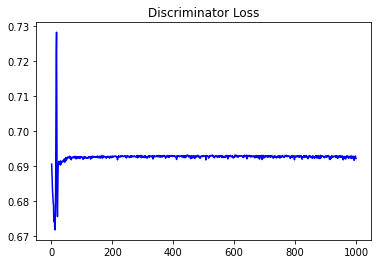

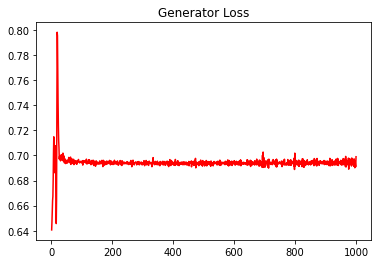

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.004212433799334301


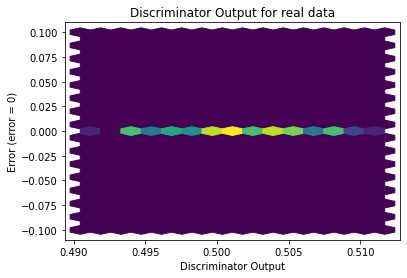

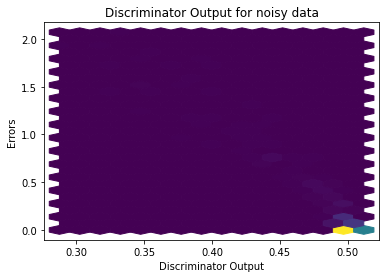

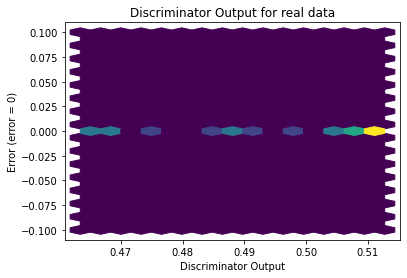

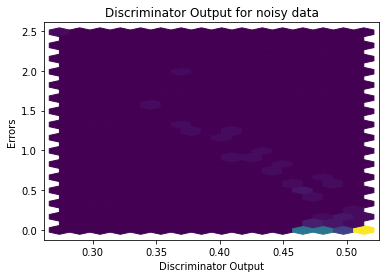

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


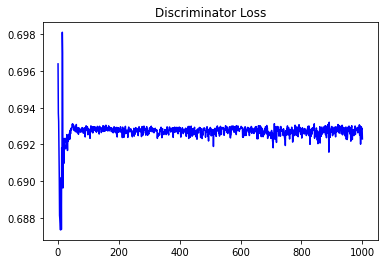

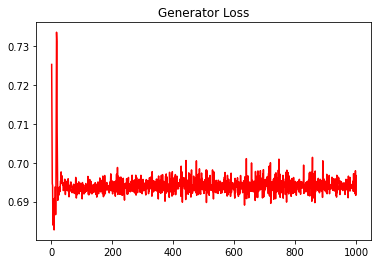

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010860950286616473


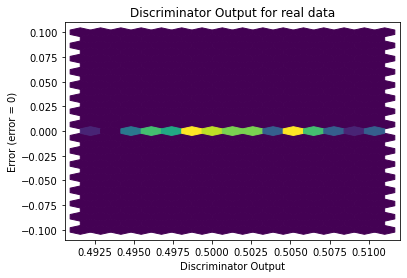

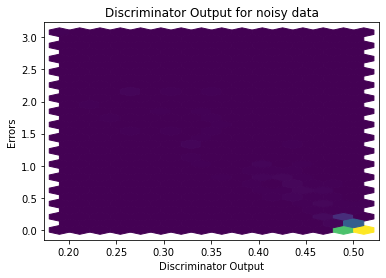

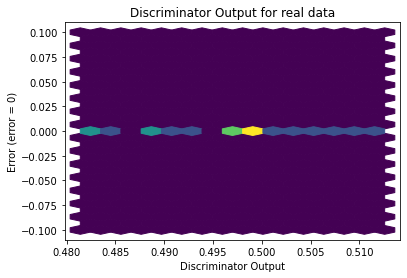

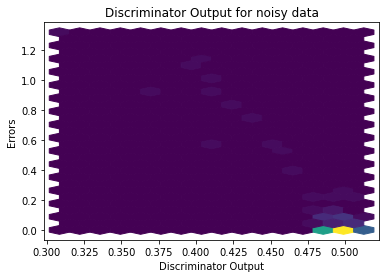

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6063]], requires_grad=True)
